In [1]:
python -m pip install scikit-learn --upgrade

SyntaxError: invalid syntax (720858094.py, line 1)

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [4]:
df = pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

# Data Cleaning and EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [9]:
df.rename(columns={'v1':'label', 'v2':'text'}, inplace=True)

In [10]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.duplicated().sum()

403

In [12]:
df.drop_duplicates(keep='first', inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5169 non-null   object
 1   text    5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [16]:
values = df['label'].value_counts()
values

ham     4516
spam     653
Name: label, dtype: int64

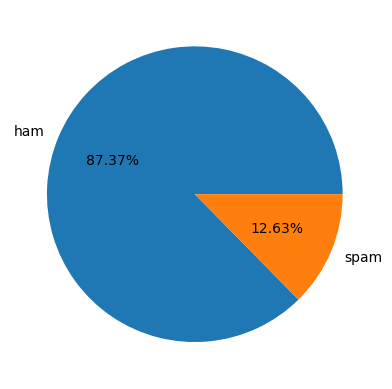

In [20]:
plt.pie(values, labels=['ham', 'spam'], autopct="%.2f%%")
plt.show()

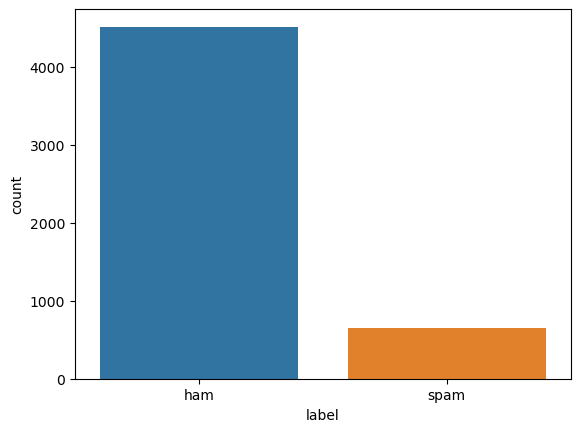

In [21]:
sns.countplot(x=df['label'])
plt.show()

# Feature Engineering

In [22]:
df['num_characters'] = df['text'].apply(len)
df.head()

,label,text,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\NEW
[nltk_data]     SKY\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [26]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,label,text,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,label,text,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


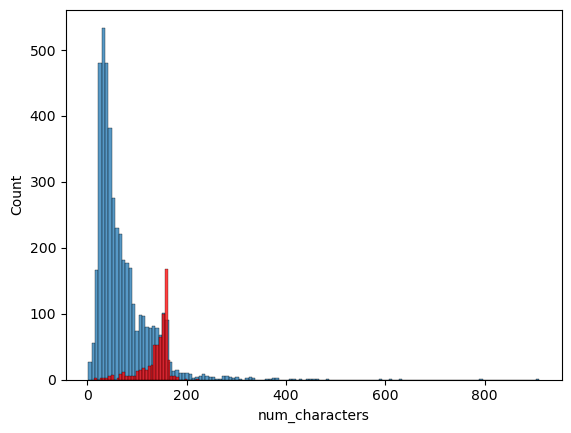

In [32]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])
sns.histplot(df[df['label']==0]['num_characters'])
sns.histplot(df[df['label']==1]['num_characters'], color='red')
plt.show()

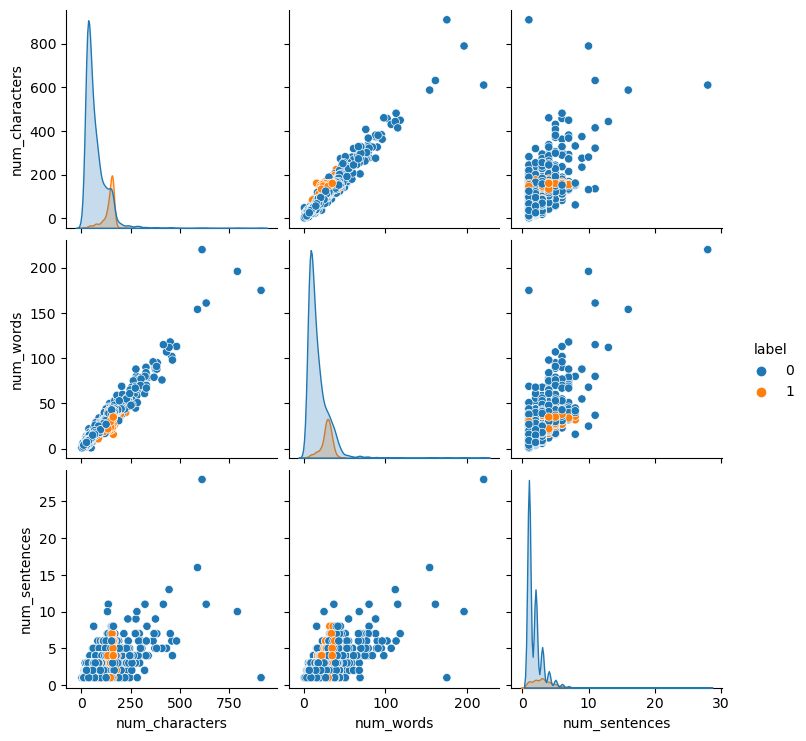

In [34]:
sns.pairplot(df, hue='label')
plt.show()

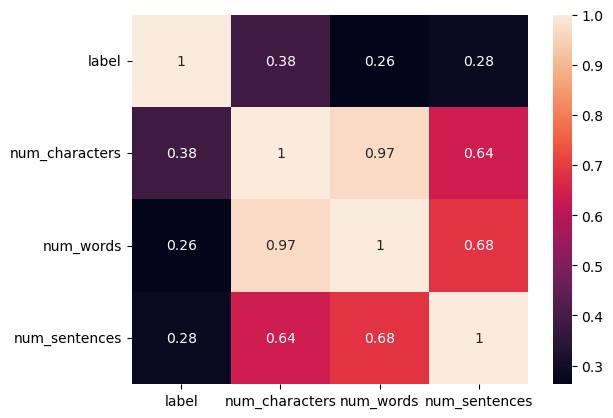

In [35]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

# Text Preprocessing

In [53]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import string
import re
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package omw-1.4 to C:\Users\NEW
[nltk_data]     SKY\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to C:\Users\NEW
[nltk_data]     SKY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\NEW
[nltk_data]     SKY\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [51]:
#Defining a function to preprocess text
def transform_text(text):
    punc = list(punctuation)
    stop = stopwords.words('english')
    bad_tokens = stop + punc
    tokens = word_tokenize(text)
    lemma = WordNetLemmatizer()
    word_tokens = [t for t in tokens if t.isalpha()]
    clean_tokens = [lemma.lemmatize(t.lower()) for t in word_tokens if t not in bad_tokens]
    return ' '.join(clean_tokens)

In [54]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,label,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry wkly comp win fa cup final tkts may...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i think go usf life around though


In [55]:
from wordcloud import WordCloud

In [56]:
ham_words = ' '.join(word for word in df[df['label']==0]['transformed_text'])

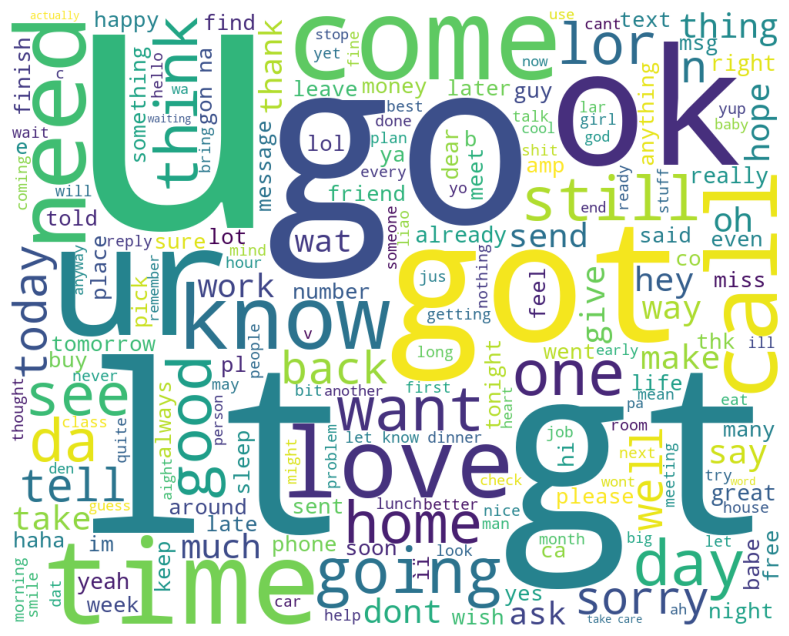

In [62]:
wordcloud = WordCloud(
    height = 800,
    width = 1000,
    background_color='white').generate(ham_words)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

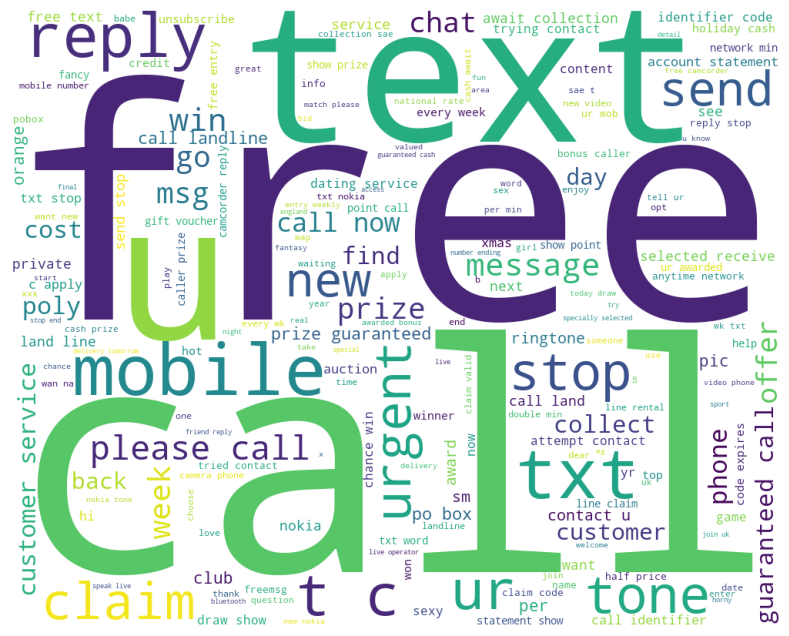

In [63]:
spam_words = ' '.join(word for word in df[df['label']==1]['transformed_text'])
wordcloud = WordCloud(
    height = 800,
    width = 1000,
    background_color='white').generate(spam_words)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Model Building

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [70]:
X = df['transformed_text']
y = df['label']

In [71]:
X = vectorizer.fit_transform(X).toarray()

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Gaussian NB

In [82]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

Accuracy Score for Gaussian: 0.879110251450677
Precision Score for Gaussian: 0.5462962962962963


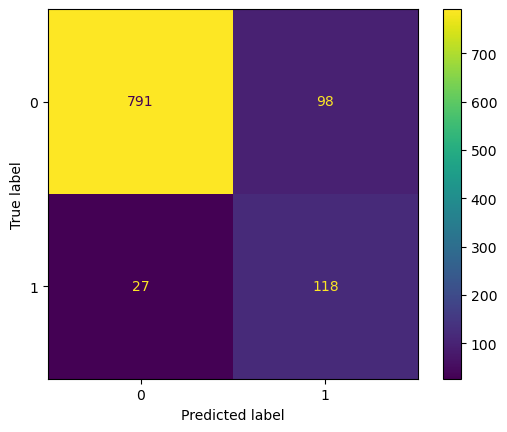

In [84]:
#Defining a function to visualize and calculate model results
def evaluation(name, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    t1 = ConfusionMatrixDisplay(cm)
    print(f"Accuracy Score for Gaussian: {accuracy_score(y_test, y_pred)}")
    print(f"Precision Score for Gaussian: {precision_score(y_test, y_pred)}")
    t1.plot()
evaluation("Classification", y_test, y_pred)

# Multinomial NB

In [94]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

Accuracy Score for Multinomial: 0.960348162475822
Precision Score for Multinomial: 0.9905660377358491


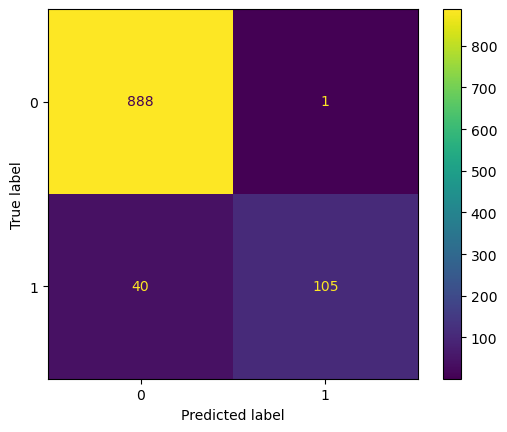

In [95]:
#Defining a function to visualize and calculate model results
def evaluation(name, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    t1 = ConfusionMatrixDisplay(cm)
    print(f"Accuracy Score for Multinomial: {accuracy_score(y_test, y_pred)}")
    print(f"Precision Score for Multinomial: {precision_score(y_test, y_pred)}")
    t1.plot()
evaluation("Classification", y_test, y_pred)

# Bernoulli NB

In [87]:
model = BernoulliNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Accuracy Score for Bernoulli: 0.9642166344294004
Precision Score for Bernoulli: 0.9576271186440678


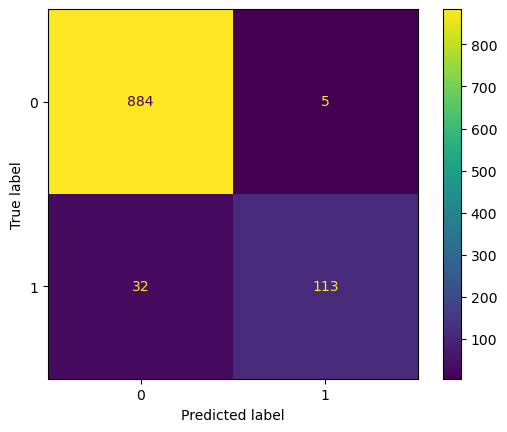

In [88]:
#Defining a function to visualize and calculate model results
def evaluation(name, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    t1 = ConfusionMatrixDisplay(cm)
    print(f"Accuracy Score for Bernoulli: {accuracy_score(y_test, y_pred)}")
    print(f"Precision Score for Bernoulli: {precision_score(y_test, y_pred)}")
    t1.plot()
evaluation("Classification", y_test, y_pred)

# Trying Random Models

In [89]:
dtf = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
svc = SVC()
xgc = XGBClassifier()

In [90]:
clfs = {
    'dtf': dtf,
    'lrc': lrc,
    'rfc': rfc,
    'svc': svc,
    'Xgb': xgc
}

In [91]:
def train_model(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [92]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    curr_accuracy, curr_precision = train_model(clf, X_train, y_train, X_test, y_test)
    print("Model: ", name)
    print("Accuracy Score: ", curr_accuracy)
    print("Precision Score: ", curr_precision)
    
    accuracy_scores.append(curr_accuracy)
    precision_scores.append(curr_precision)

Model:  dtf
Accuracy Score:  0.9477756286266924
Precision Score:  0.8053691275167785
Model:  lrc
Accuracy Score:  0.9468085106382979
Precision Score:  0.9411764705882353
Model:  rfc
Accuracy Score:  0.9671179883945842
Precision Score:  0.9911504424778761
Model:  svc
Accuracy Score:  0.9680851063829787
Precision Score:  0.9827586206896551
Model:  Xgb
Accuracy Score:  0.9690522243713733
Precision Score:  0.937984496124031


In [93]:
Evaluation_df = pd.DataFrame({'Model': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores})
Evaluation_df

,Model,Accuracy,Precision
0,dtf,0.947776,0.805369
1,lrc,0.946809,0.941176
2,rfc,0.967118,0.991150
3,svc,0.968085,0.982759
4,Xgb,0.969052,0.937984


After evaluating the performace of different models we decided to go with Multinomial NB..!

In [101]:
#Lets export model to use it in our app
import pickle
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))